<a href="https://colab.research.google.com/github/SonishMaharjanfuse/Assignment-4-Pandas/blob/dev_pandas_assignment/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get the dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=1xSh87wC1bFnCnWzgW7ktDQHRL5amnLbH

Downloading...
From: https://drive.google.com/uc?id=1xSh87wC1bFnCnWzgW7ktDQHRL5amnLbH
To: /content/csv_data.zip
100% 2.56M/2.56M [00:00<00:00, 156MB/s]


In [2]:
!unzip csv_data.zip

Archive:  csv_data.zip
   creating: csv_data/.ipynb_checkpoints/
  inflating: csv_data/.ipynb_checkpoints/knn-checkpoint.ipynb  
  inflating: csv_data/Admission_data.csv  
  inflating: csv_data/advertising.csv  
  inflating: csv_data/AirPassengers.csv  
  inflating: csv_data/appointment_schedule.csv  
  inflating: csv_data/auto-mpg.data  
  inflating: csv_data/auto-mpg.names  
  inflating: csv_data/bike_rental_datasets.csv  
  inflating: csv_data/car_details.csv  
  inflating: csv_data/cars_df.csv    
  inflating: csv_data/cricket_scores.csv  
   creating: csv_data/crop_health/
  inflating: csv_data/crop_health/test.csv  
  inflating: csv_data/crop_health/train.csv  
  inflating: csv_data/crop_health_final.csv  
  inflating: csv_data/Fortune_1000.csv  
  inflating: csv_data/imports-85.data  
  inflating: csv_data/IPL_Matches_2008_2022.csv  
  inflating: csv_data/ipl2022_team_stats.csv  
  inflating: csv_data/Iris.csv       
  inflating: csv_data/titanic.csv    
  inflating: csv_data/wa

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bike_rental_df = pd.read_csv("./csv_data/bike_rental_datasets.csv", parse_dates=['dteday'])
bike_rental_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [6]:
bike_rental_df[bike_rental_df['season'] == 4].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6250,6251,2011-09-23,4,0,9,0,0,5,1,2,0.62,0.5455,0.94,0.0896,11,41,52
6251,6252,2011-09-23,4,0,9,1,0,5,1,2,0.60,0.5000,1.00,0.0000,2,29,31
6252,6253,2011-09-23,4,0,9,2,0,5,1,2,0.60,0.5000,1.00,0.1045,6,14,20
6253,6254,2011-09-23,4,0,9,3,0,5,1,2,0.60,0.5000,1.00,0.0000,3,5,8
6254,6255,2011-09-23,4,0,9,4,0,5,1,3,0.60,0.5000,1.00,0.0000,6,7,13


In [13]:
categories = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

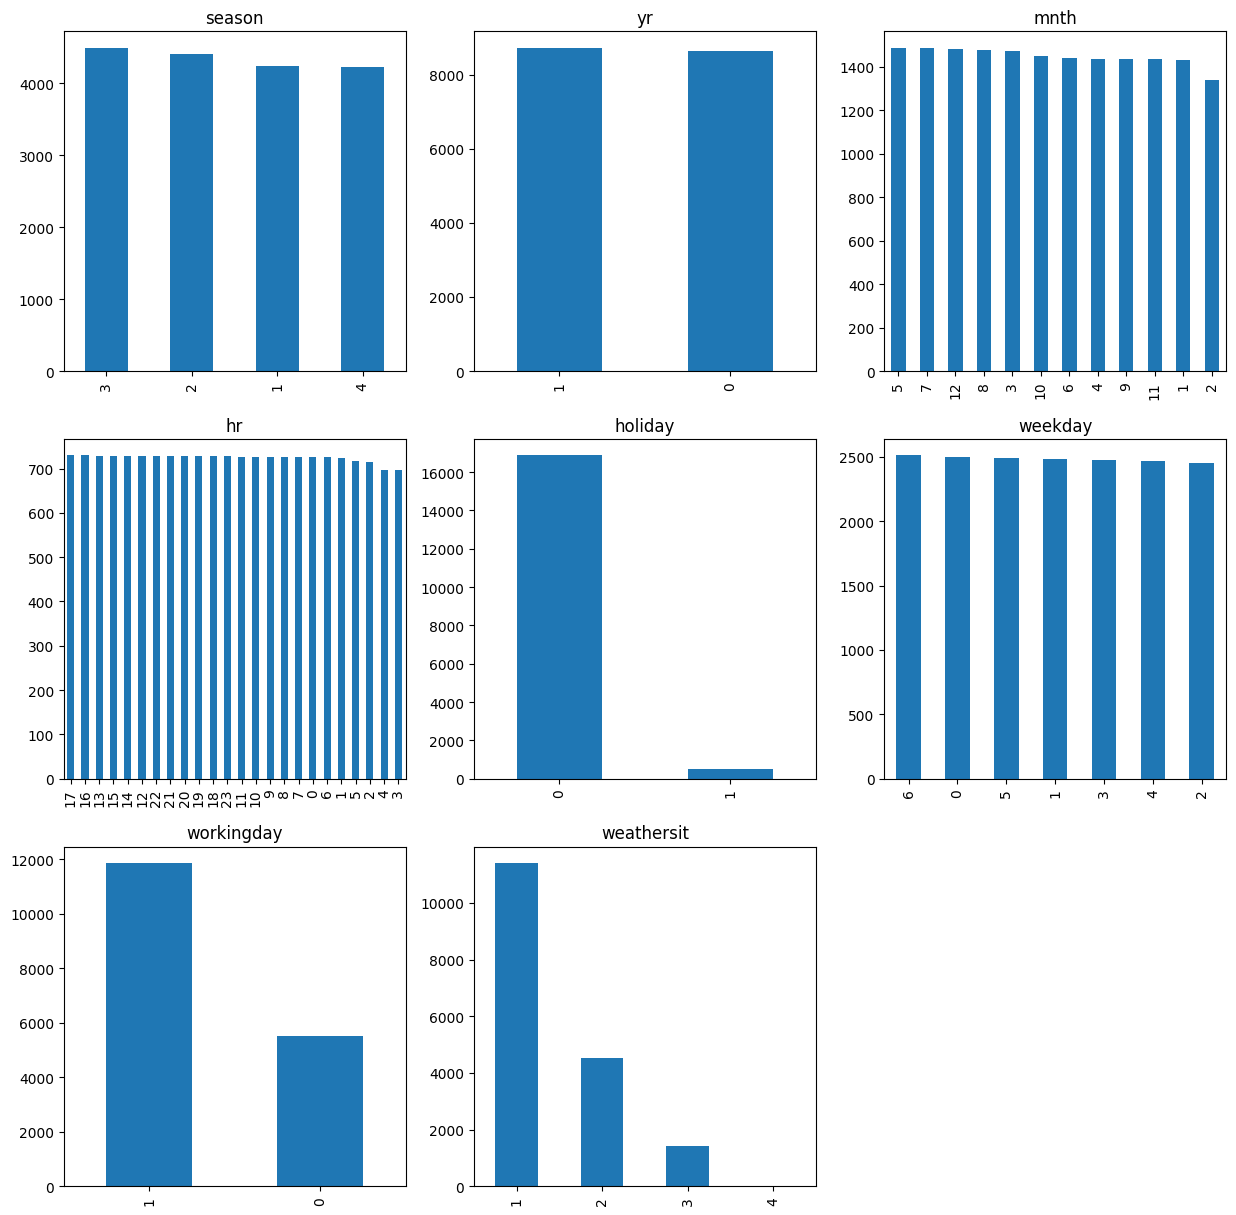

In [14]:
i = 1

plt.figure(figsize=(15,15))
for categorie in categories:

  plt.subplot(3,3,i)
  bike_rental_df[categorie].value_counts().plot(kind='bar')
  plt.title(f"{categorie}")
  i+=1
plt.show()

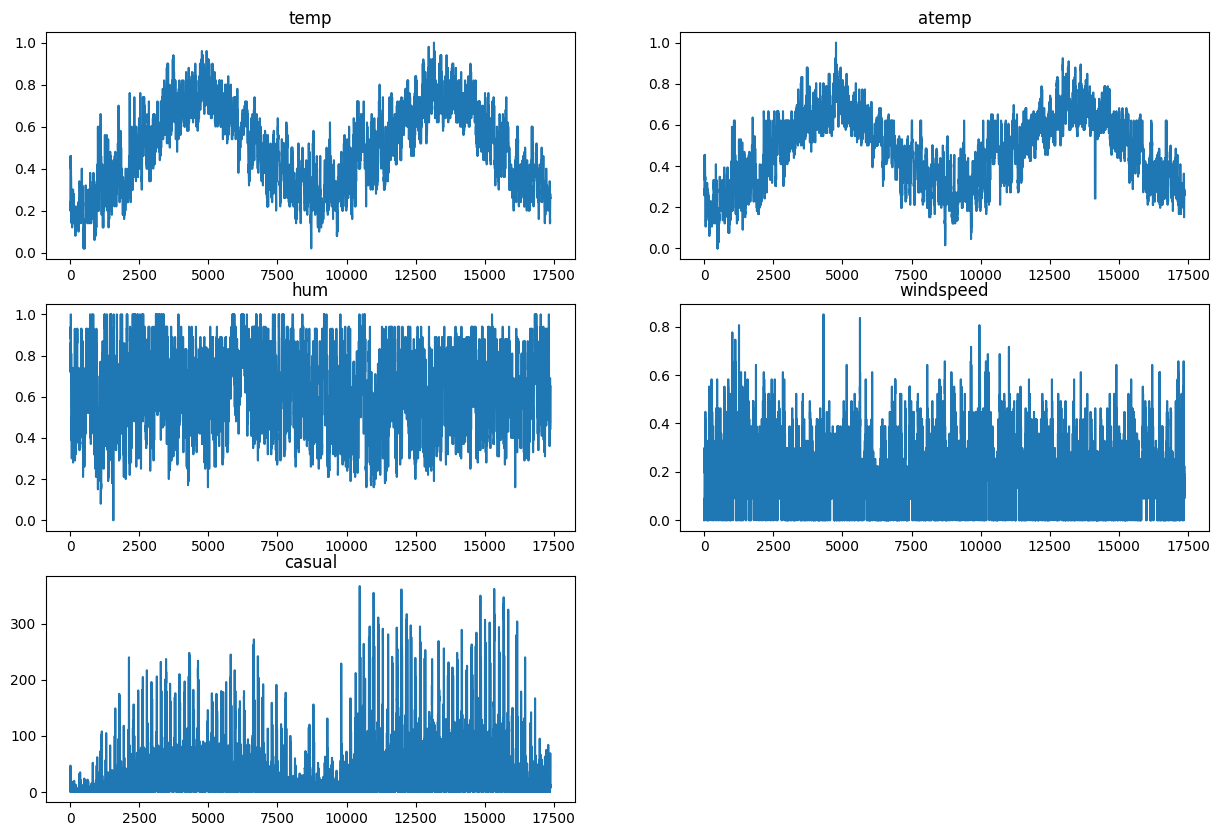

In [15]:
continous = ['temp', 'atemp', 'hum', 'windspeed', 'casual']
i = 1

plt.figure(figsize=(15,10))
for cont in continous:

  plt.subplot(3,2,i)
  bike_rental_df[cont].plot(kind='line')
  plt.title(f"{cont}")
  i+=1
plt.show()

In [16]:
def plot_graph_between_two(group, value):
  return bike_rental_df.groupby(group)[value].sum().plot(kind='line')

In [17]:
def bar_graph_between_two(group, value):
  return bike_rental_df.groupby(group)[value].sum().plot(kind='bar')

In [18]:
def avg_graph_between_two(group, value):
  return bike_rental_df.groupby(group)[value].mean().plot(kind='line')

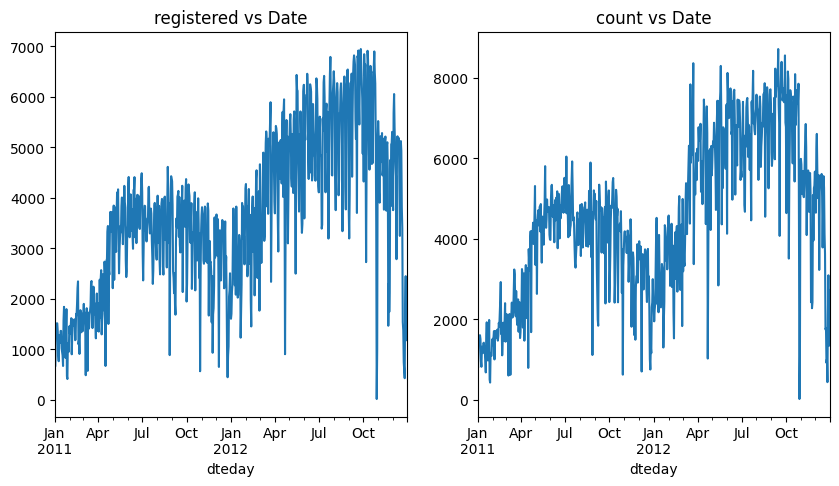

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_graph_between_two('dteday','registered')
plt.title("registered vs Date")
plt.subplot(1,2,2)
plot_graph_between_two('dteday','cnt')
plt.title("count vs Date")
plt.show()

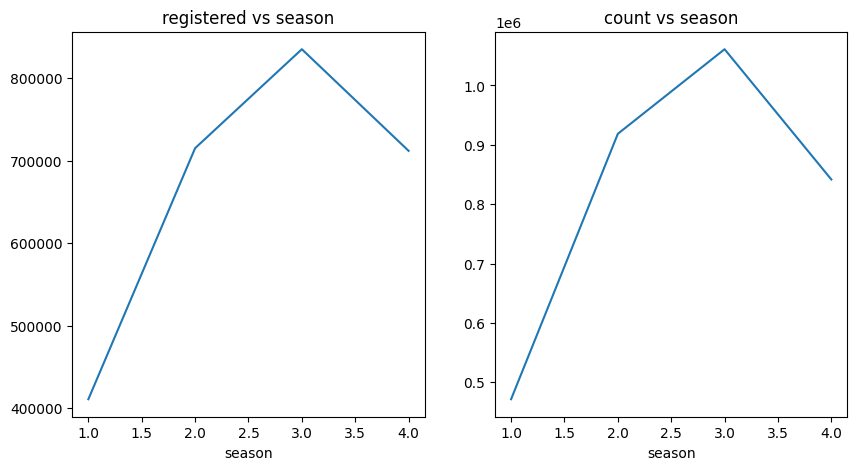

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_graph_between_two('season','registered')
plt.title("registered vs season")
plt.subplot(1,2,2)
plot_graph_between_two('season','cnt')
plt.title("count vs season")
plt.show()

Text(0.5, 1.0, 'hum vs season')

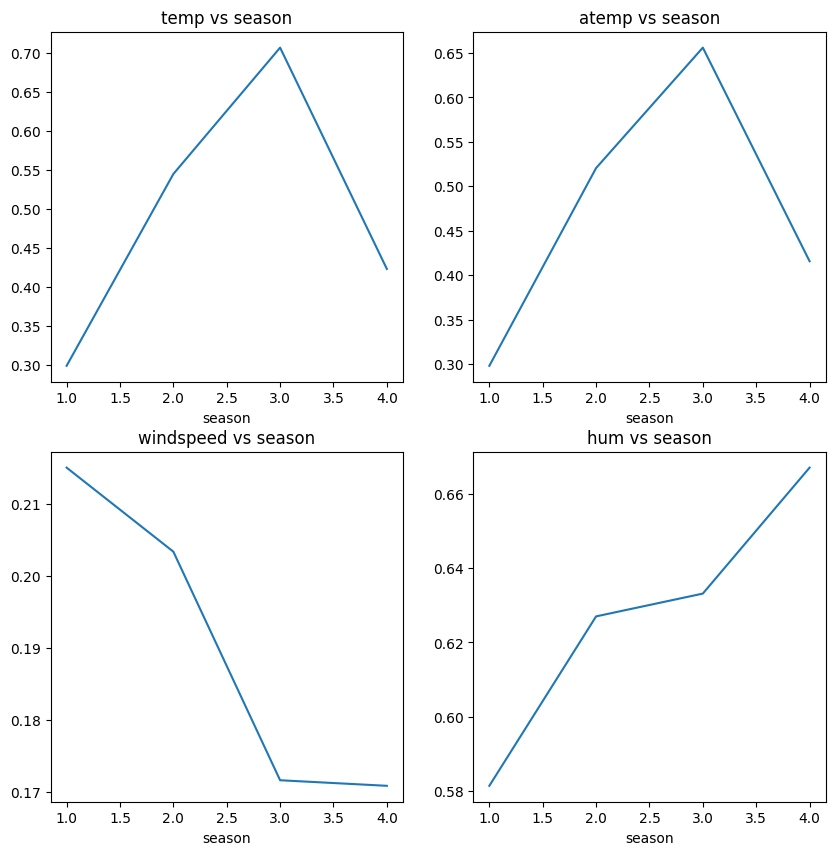

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
avg_graph_between_two('season','temp')
plt.title("temp vs season")
plt.subplot(2,2,2)
avg_graph_between_two('season','atemp')
plt.title("atemp vs season")
plt.subplot(2,2,3)
avg_graph_between_two('season','windspeed')
plt.title("windspeed vs season")
plt.subplot(2,2,4)
avg_graph_between_two('season','hum')
plt.title("hum vs season")

In [30]:
bike_rental_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


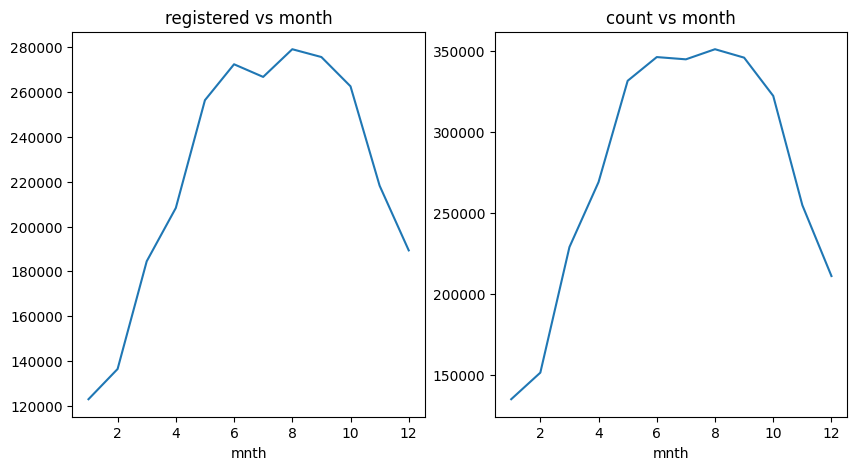

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_graph_between_two('mnth','registered')
plt.title("registered vs month")
plt.subplot(1,2,2)
plot_graph_between_two('mnth','cnt')
plt.title("count vs month")
plt.show()

Text(0.5, 1.0, 'hum vs mnth')

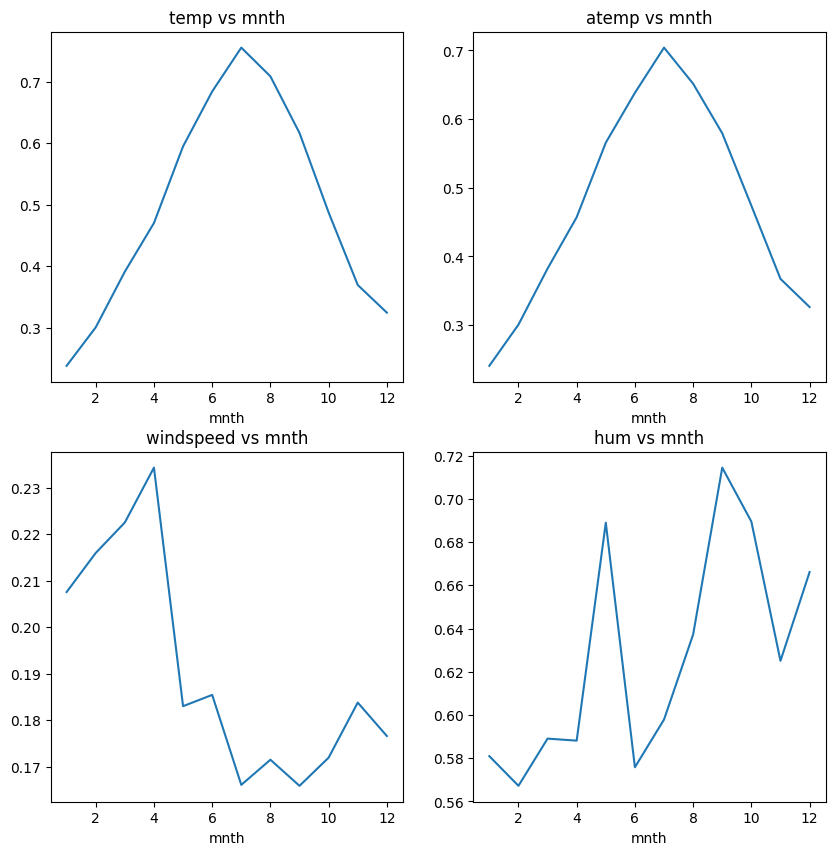

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
avg_graph_between_two('mnth','temp')
plt.title("temp vs mnth")
plt.subplot(2,2,2)
avg_graph_between_two('mnth','atemp')
plt.title("atemp vs mnth")
plt.subplot(2,2,3)
avg_graph_between_two('mnth','windspeed')
plt.title("windspeed vs mnth")
plt.subplot(2,2,4)
avg_graph_between_two('mnth','hum')
plt.title("hum vs mnth")

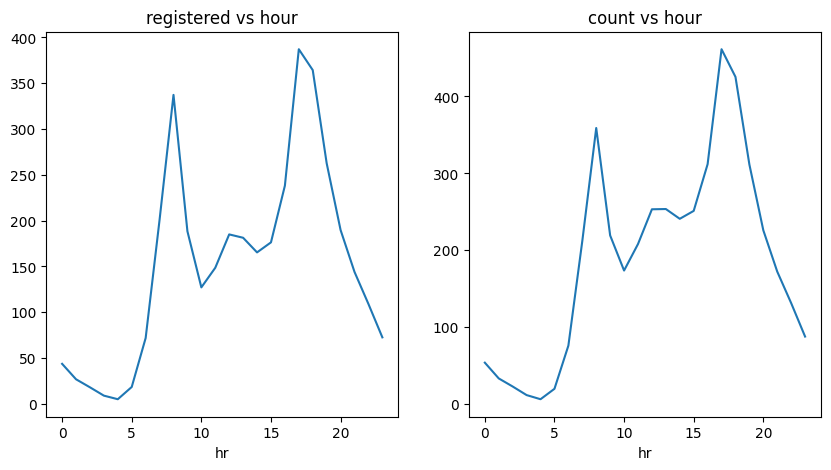

In [64]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
avg_graph_between_two('hr','registered')
plt.title("registered vs hour")
plt.subplot(1,2,2)
avg_graph_between_two('hr','cnt')
plt.title("count vs hour")
plt.show()

Text(0.5, 1.0, 'hum vs hr')

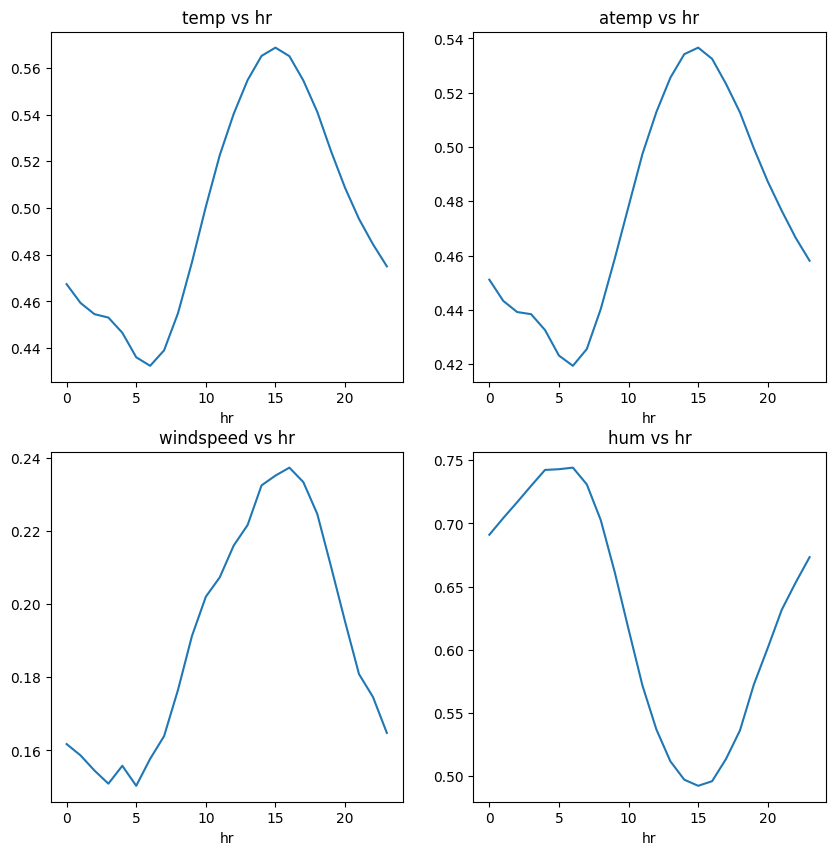

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
avg_graph_between_two('hr','temp')
plt.title("temp vs hr")
plt.subplot(2,2,2)
avg_graph_between_two('hr','atemp')
plt.title("atemp vs hr")
plt.subplot(2,2,3)
avg_graph_between_two('hr','windspeed')
plt.title("windspeed vs hr")
plt.subplot(2,2,4)
avg_graph_between_two('hr','hum')
plt.title("hum vs hr")

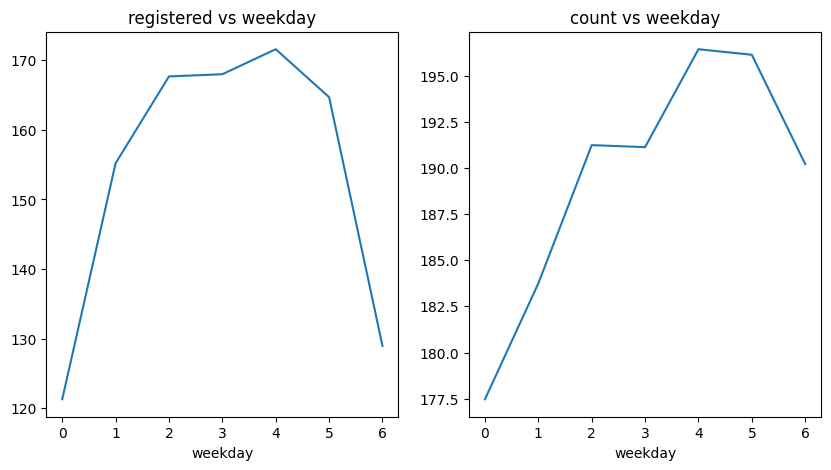

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
avg_graph_between_two('weekday','registered')
plt.title("registered vs weekday")
plt.subplot(1,2,2)
avg_graph_between_two('weekday','cnt')
plt.title("count vs weekday")
plt.show()

Text(0.5, 1.0, 'hum vs weekday')

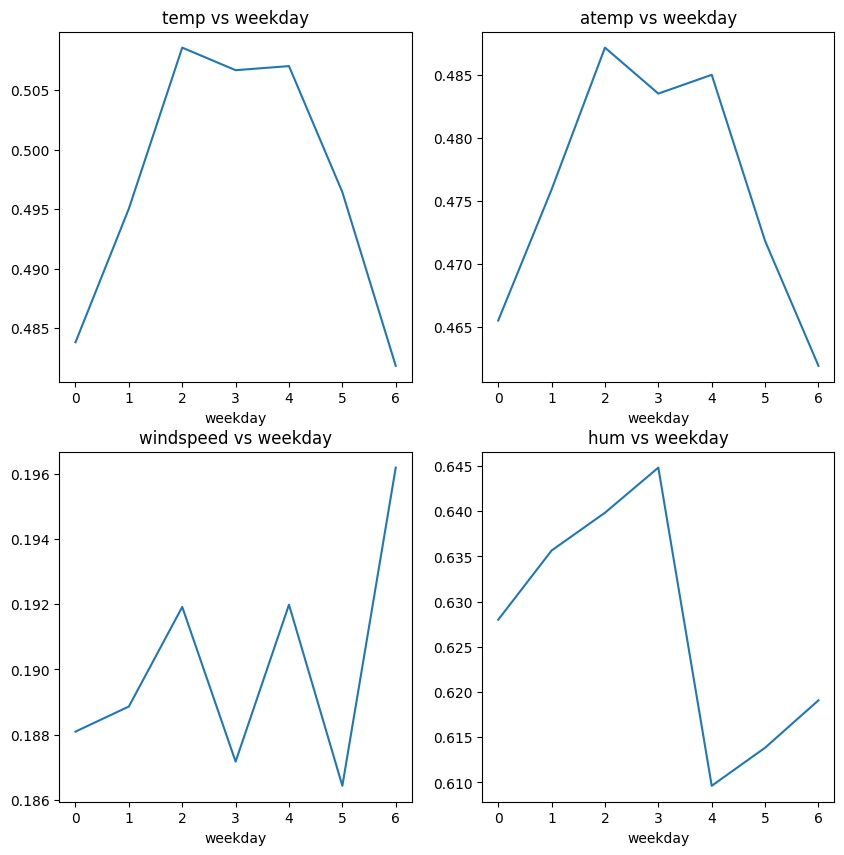

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
avg_graph_between_two('weekday','temp')
plt.title("temp vs weekday")
plt.subplot(2,2,2)
avg_graph_between_two('weekday','atemp')
plt.title("atemp vs weekday")
plt.subplot(2,2,3)
avg_graph_between_two('weekday','windspeed')
plt.title("windspeed vs weekday")
plt.subplot(2,2,4)
avg_graph_between_two('weekday','hum')
plt.title("hum vs weekday")

In [62]:
bike_rental_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
